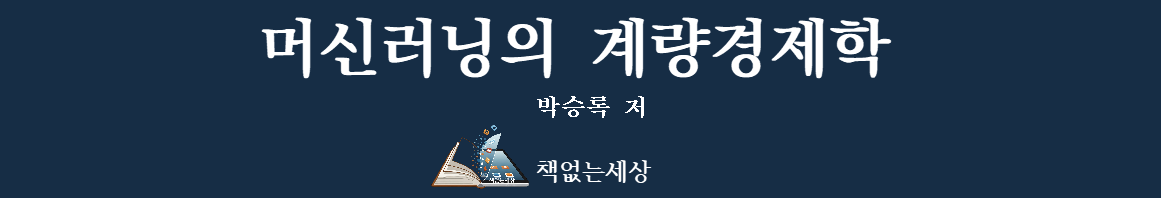

# Part 8: 인과추론

## Chapter 4: 인과관계의 발견(Google Colab에서 실행 추천)

In [9]:
import pandas as pd
import numpy as np
import dowhy
import pydot
#import pygraphviz
import graphviz
import networkx as nx
import matplotlib.pyplot as plt
import io
import matplotlib.image as mpimg
import lingam
from lingam.utils import make_dot
from dowhy import CausalModel
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges
from causallearn.search.FCMBased import lingam
from causallearn.search.FCMBased.lingam.utils import make_dot
from causallearn.search.HiddenCausal.GIN.GIN import GIN
from causallearn.search.PermutationBased.GRaSP import grasp
from causallearn.search.Granger.Granger import Granger
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(precision=3, suppress=True)
np.random.seed(12345)

### 3. Causal-learn을 이용한 인과 발견

In [10]:
# 데이터 읽어오기
X = pd.read_csv('http://www.causality.inf.ethz.ch/data/lucas0_train.csv')
X.head()
data = X.to_numpy()
variable_names = list(X.columns)
X.head()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
0,0,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0,1


In [11]:
model = lingam.DirectLiNGAM()
aaa = model.fit(X)

In [ ]:
display(model.adjacency_matrix_)

array([[ 0.   ,  0.81 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.458,  0.   ,  0.   , -0.057,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.161,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.361,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.272,  0.   ,  0.   ,
         0.458,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   , 

In [12]:
column_labels = X.columns.tolist()

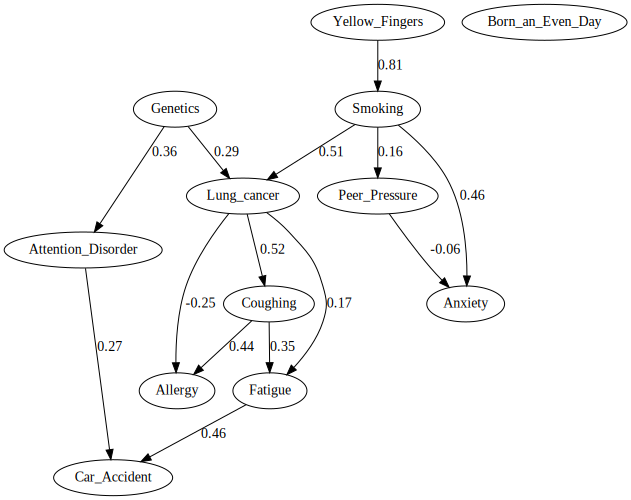

In [13]:
make_dot(model.adjacency_matrix_, labels=column_labels)

In [14]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

# X = pd.read_csv('./lucas0_train.csv')
# X.head()

# 데이터 읽어오기
X = pd.read_csv('http://www.causality.inf.ethz.ch/data/lucas0_train.csv')
X.drop('Car_Accident', axis=1, inplace=True)
X.head()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Fatigue,Allergy,Coughing,Lung_cancer
0,0,0,1,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0
4,1,1,1,0,0,1,1,1,0,0,1


In [15]:
model = lingam.DirectLiNGAM()
model.fit(X)

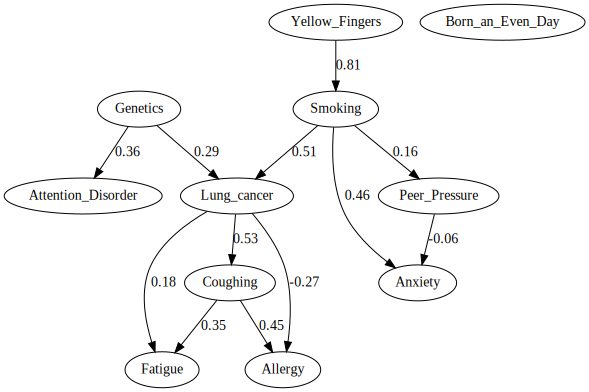

In [18]:
labels = X.columns.tolist()
make_dot(model.adjacency_matrix_, labels=labels)

  0%|          | 0/12 [00:00<?, ?it/s]

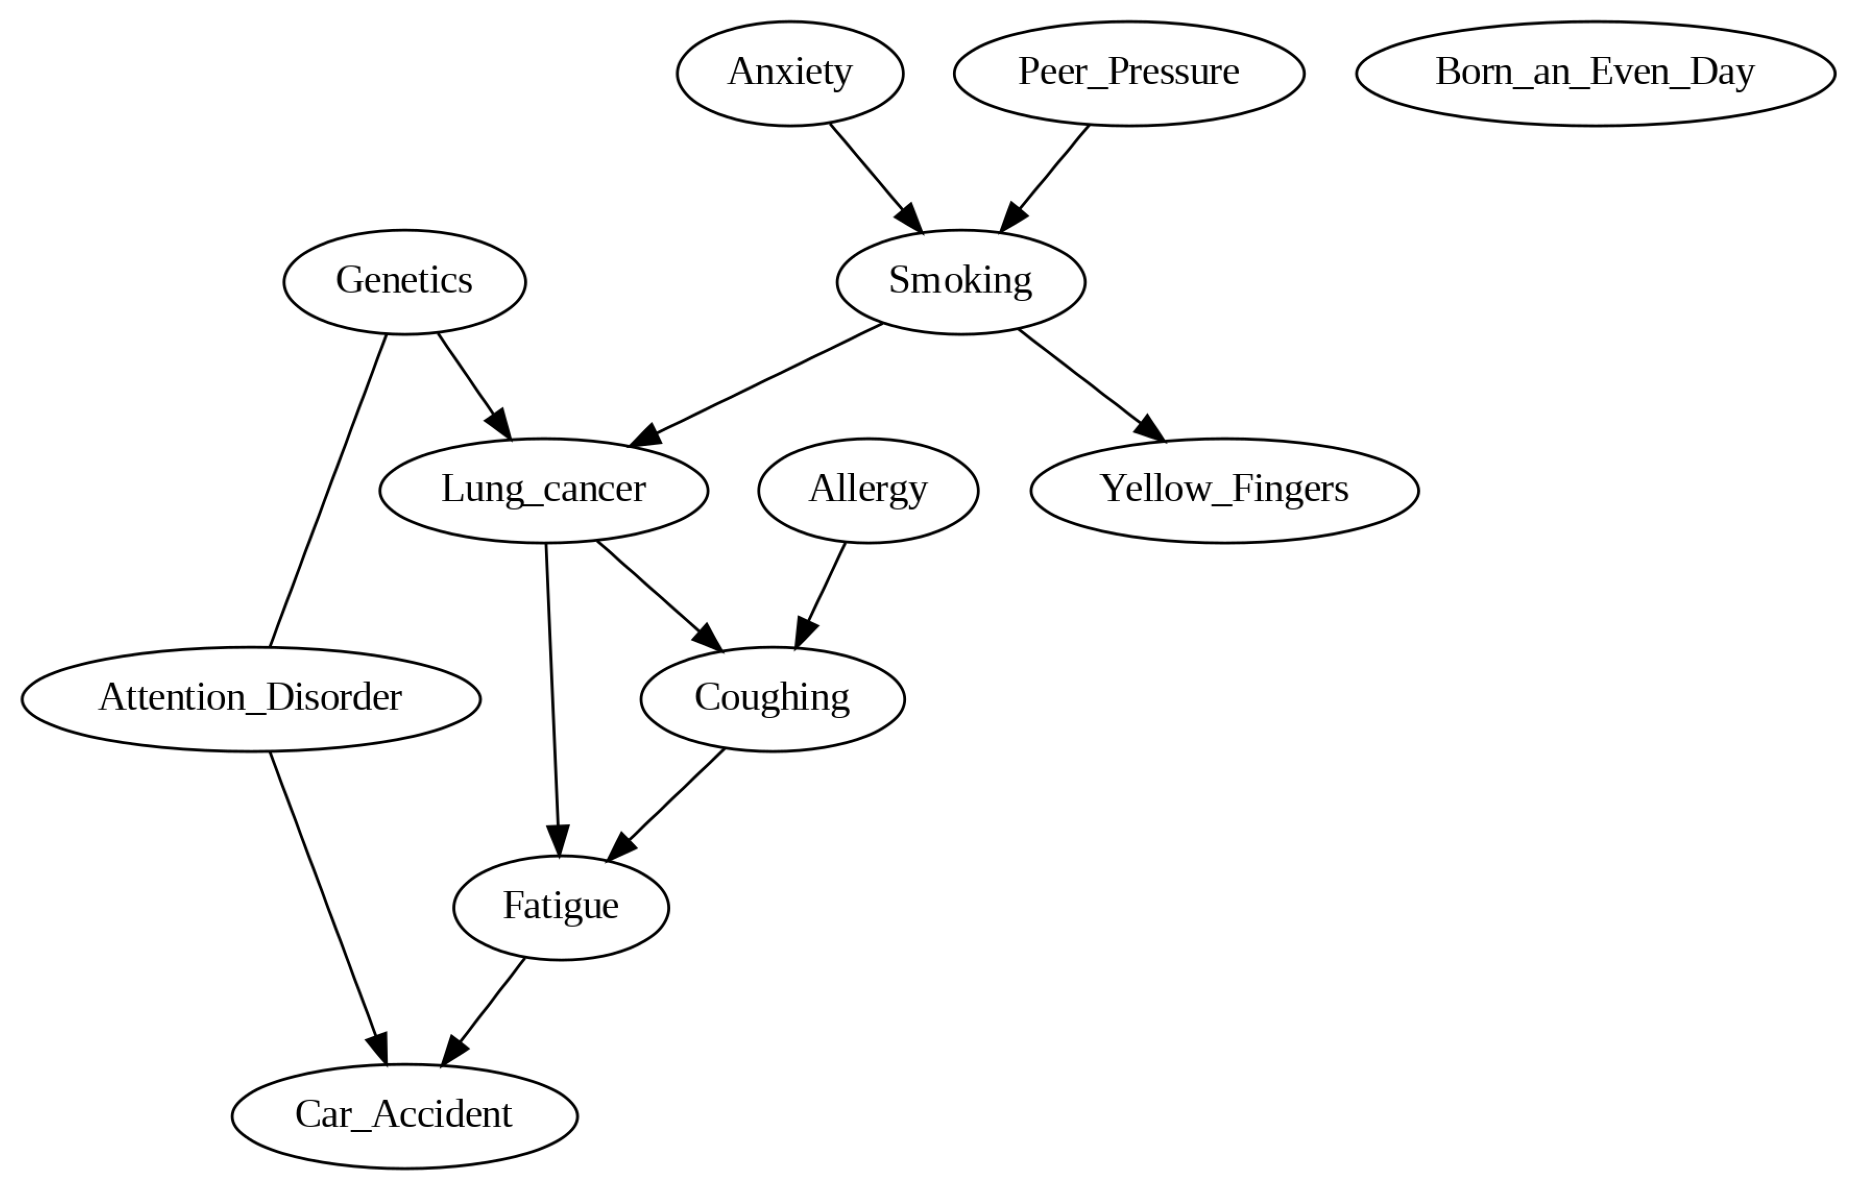

In [24]:
# 데이터 읽어오기
X = pd.read_csv('http://www.causality.inf.ethz.ch/data/lucas0_train.csv')
X.head()
data = X.to_numpy()
variable_names = list(X.columns)

# 1. Constraint-based Causal Discovery Methods
## PC Algorithm Example
causal_graph_pc = pc(data)
causal_graph_pc.draw_pydot_graph(labels=variable_names)

# Save the graph
pyd = GraphUtils.to_pydot(causal_graph_pc.G, labels=variable_names)
pyd.write_png('causal_graph_pc.png')


In [26]:
## FCI Algorithm Example
causal_graph_fci, edges = fci(data)
pdy = GraphUtils.to_pydot(causal_graph_fci, labels=variable_names)
pdy.write_png('causal_graph_fci.png')

  0%|          | 0/12 [00:00<?, ?it/s]

X1 --> X2
X1 --> X12
X9 --> X8
X11 --> X9
X12 --> X9
X12 --> X11


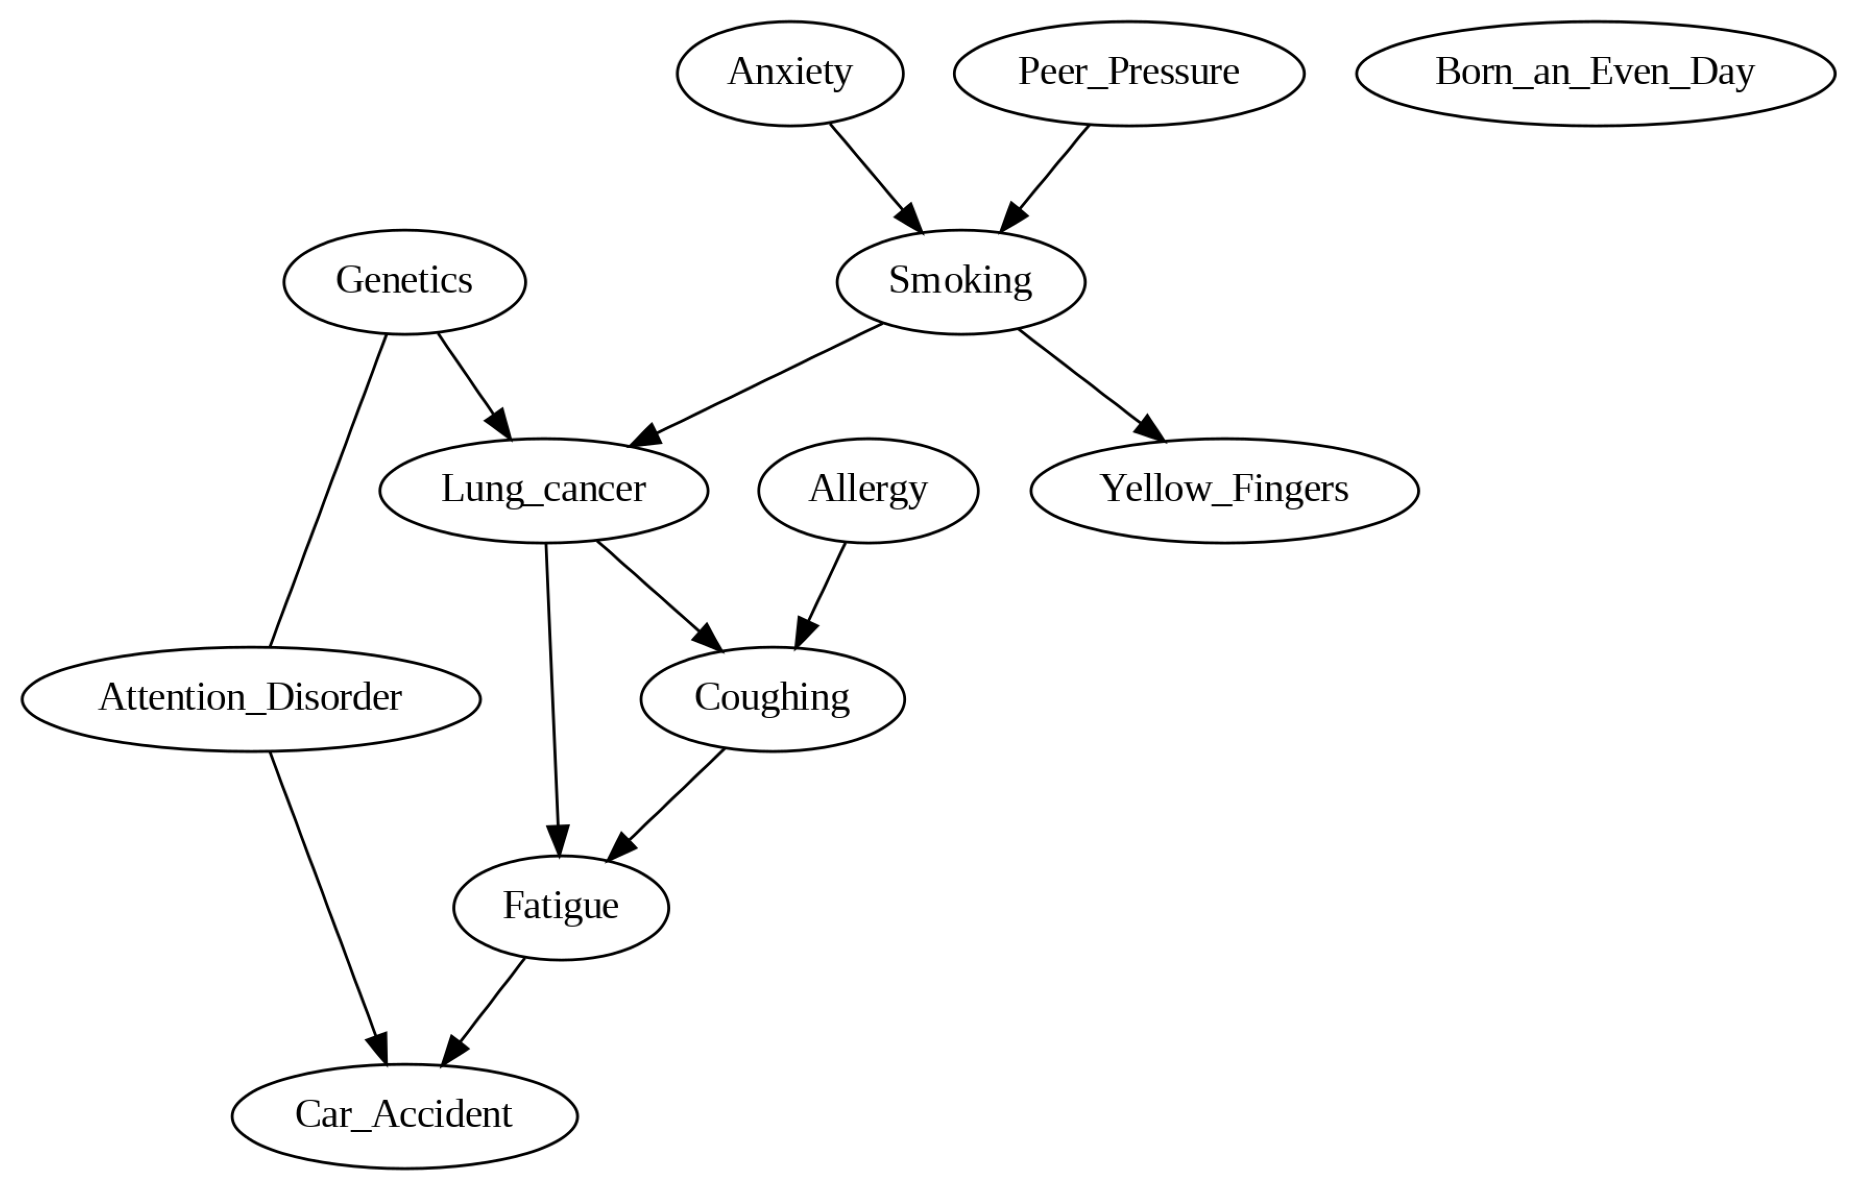

In [27]:
# 2. Score-based Causal Discovery Methods
## GES Algorithm with BIC Score Example

causal_graph_ges = ges(data)

pyd = GraphUtils.to_pydot(causal_graph_ges['G'], labels=variable_names)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Save the graph
pyd.write_png('causal_graph_ges.png')


[[ 0.     0.81   0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.458  0.     0.    -0.059  0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.164  0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.     0.     0.     0.362  0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.275  0.     0.     0.461  0.
   0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.353  0.176]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.453 -0.266]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.528]
 [ 0.508  0.     0.     0.     0.288  0.     0.     0.

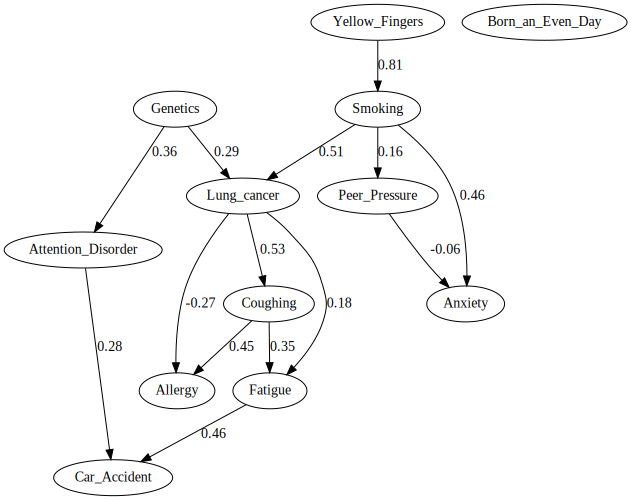

In [28]:
# 3. Causal Discovery Methods based on Constrained Functional Causal Models
## LiNGAM-based Methods Example
model = lingam.DirectLiNGAM(data)
model.fit(data)
print(model.adjacency_matrix_)

make_dot(model.adjacency_matrix_, labels=list(X.columns))



In [ ]:
# 4. Hidden Causal Representation Learning
## GIN Condition-based Method Example
G, K = GIN(data)

pyd = GraphUtils.to_pydot(G)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

GRaSP edge count: 12    
GRaSP completed in: 0.09s 


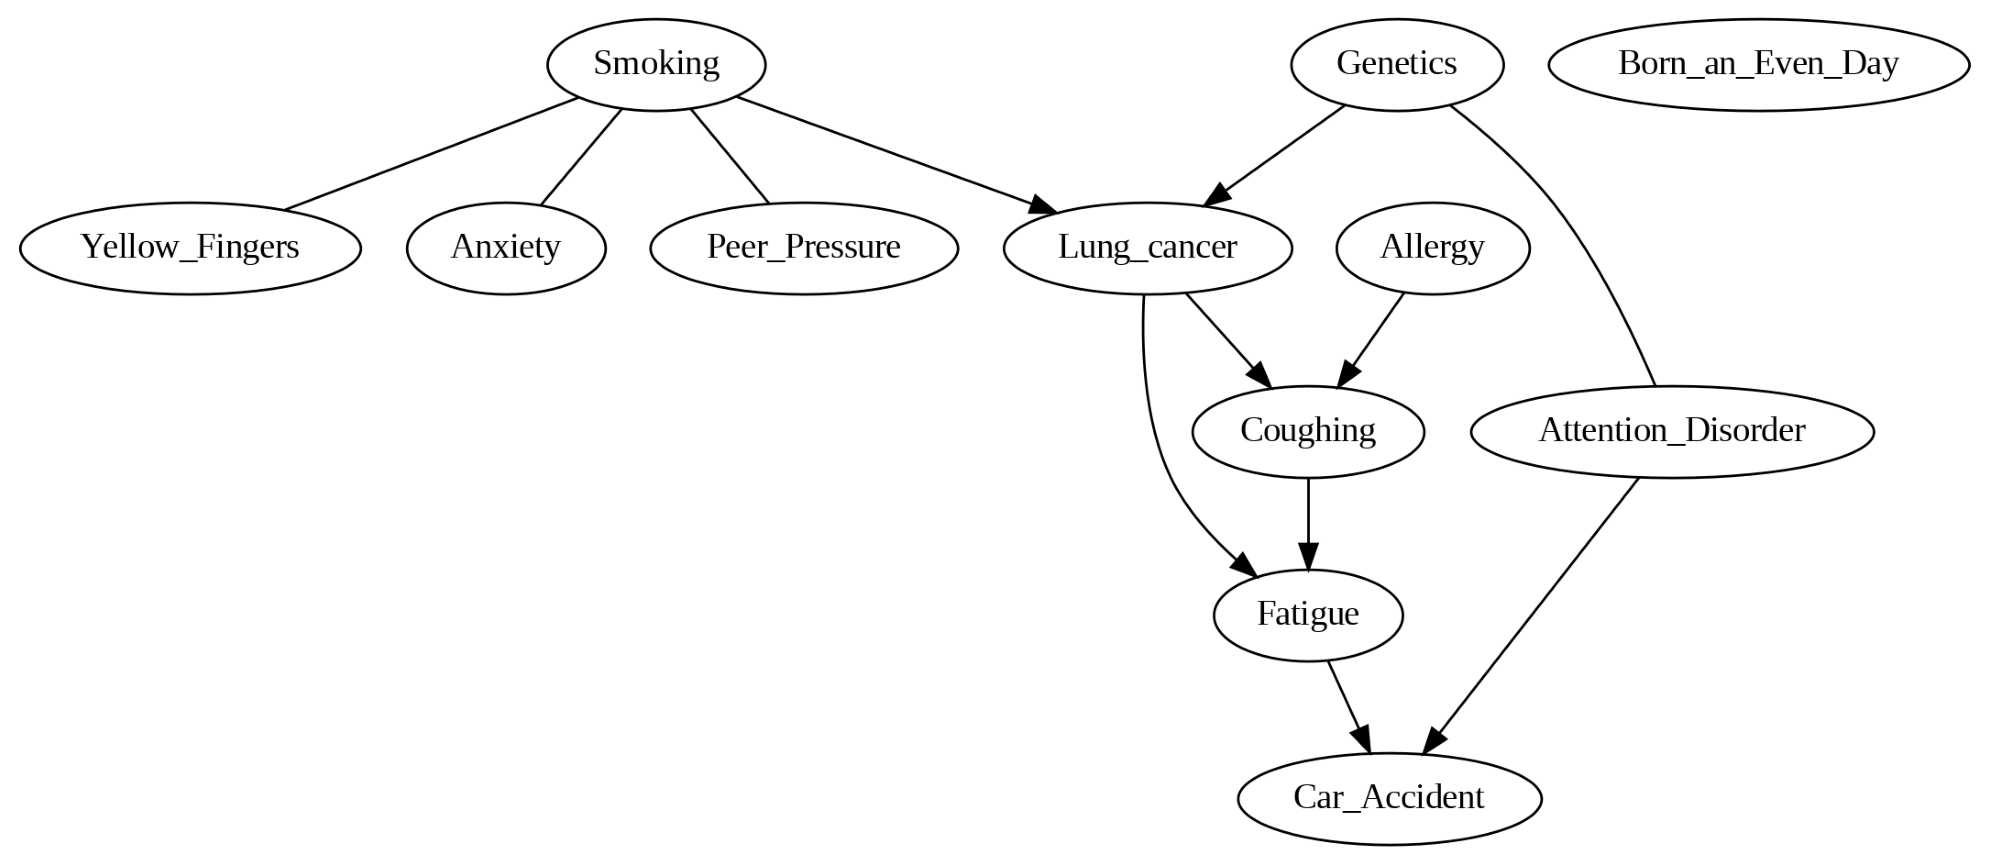

In [30]:
# 5. Permutation-based Causal Discovery Methods
## GRaSP Algorithm Example
G = grasp(data)

pyd = GraphUtils.to_pydot(G, labels=variable_names)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()